In [618]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from plotnine.data import mtcars

from ff_energy.pydcm.kernel import KernelFit
from ff_energy.pydcm import dcm_utils as du

import numpy as np

import pandas as pd
import numpy as np
import pandas.api.types as pdtypes

from plotnine import (
    ggplot,
    aes,
    stage,
    geom_violin,
    geom_point,
    geom_line,
    geom_boxplot,
    scale_fill_manual,
    theme,
    theme_classic,
    scale_alpha,
    scale_color_cmap,
    scale_color_gradient,
    theme_minimal,
    theme_tufte,
    theme_xkcd,
    theme_void,
    geom_jitter,
    labs, 
    ggtitle
)

import patchworklib as pw

import seaborn as sns

csv_dir = "/home/boittier/Documents/phd/ff_energy/ff_energy/pydcm/tests"

In [634]:
def get_change_graph(row):
    a, row = row
    k1 = row[0]
    k2 = row[1]
    a = row[5]
    n = row[2]
    rmse = row[3]
    rmse2 = row[4]
    l = row[6]
    return plot_change2(csv_dict[k1], 
                     csv_dict[k2],
                standard, 
                pca_df, 
                title=f"\n$\\alpha = $ {a} | $\lambda = $ {l:.1f} | RMSE = {rmse:.2f} | $n$ = {n}")

def get_brick(row):
    return pw.load_ggplot(get_change_graph(row), figsize=(4,4))

In [652]:
def test_load_data(l2 = '100.0'):
    PICKLES = list(Path(f"/home/boittier/Documents/phd/ff_energy/cubes/clcl/{l2}")
                   .glob("*.obj"))
    scanpath = Path("/home/boittier/Documents/phd/ff_energy/cubes/dcm/")

    def name_(x):
        if "gaussian" in str(x):
            return scanpath / "scan" / (x.name.split(".c")[0] + ".cube")
        elif "_nms_" in str(x):
            return scanpath / "nms" / (x.name.split(".c")[0] + ".cube")
        else:
            print(f"ValueError(fbad pickle name {x})")
            return None

    PICKLES = [_ for _ in PICKLES if name_(_) is not None]
    CUBES = [name_(_) for _ in PICKLES]
    return du.get_data(CUBES, PICKLES, 5)

l2 = "0.0"
alpha = 0
N_factor = 2
x, i, y, cubes, pickles = test_load_data(l2=str(l2))

k = KernelFit()
k.set_data(x, i, y, cubes, pickles)
k.fit(alpha=alpha, N_factor=N_factor)

N_SAMPLE_POINTS set to 70


In [10]:
csv_files = list(Path(csv_dir).glob("*.csv"))

In [13]:
csv_dict = {}
for i in csv_files:
    csv_dict[i.stem] = pd.read_csv(i)

In [680]:
standard = csv_dict["standard_"]
standard
# plt.hist(standard["rmses"])

Unnamed: 0     rmses                                           filename
0             0  0.824078  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
1             1  0.906636  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
2             2  0.824242  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
3             3  0.992409  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/test...
4             4  1.031105  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
..          ...       ...                                                ...
135         135  0.649978  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
136         136  0.811865  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/test...
137         137  0.851015  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/gaus...
138         138  0.701981  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/test...
139         139  0.650941  pkls/45c27a69-569e-4281-a6e6-38233c801ec9/test...

[140 rows x 3 columns]

In [658]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(k.X)
exp_var = pca.explained_variance_

In [695]:
pca = k.pca()

pca_df = pd.DataFrame(pca)
pca_df["cosin_angle"] = np.arctan2(abs(pca_df[0]), abs(pca_df[1]))
pca_df["fn"] = standard["filename"].apply(lambda x: x.split("/")[-1].split(".")[0])

In [709]:
pca_df.sort_values([0,1])

0         1  cosin_angle                            fn
137 -0.292100  0.114933     1.195929  gaussian_39_dcm_pbe0_adz_esp
86  -0.287931 -0.120870     1.173349  gaussian_15_dcm_pbe0_adz_esp
130 -0.280245 -0.115937     1.178538   gaussian_9_dcm_pbe0_adz_esp
57  -0.279331 -0.115350     1.179175                 test_nms_37_2
37  -0.278907 -0.115078     1.179472                 test_nms_24_2
..        ...       ...          ...                           ...
104  0.248752 -0.121770     1.115564  gaussian_66_dcm_pbe0_adz_esp
45   0.256106  0.016045     1.508228  gaussian_62_dcm_pbe0_adz_esp
30   0.274546 -0.015833     1.513192                 test_nms_48_1
56   0.293750 -0.047717     1.409763                 test_nms_47_5
64   0.313711 -0.079593     1.322324                 test_nms_29_1

[140 rows x 4 columns]

In [710]:
purple = list(pca_df[pca_df["cosin_angle"] < 0.5]["fn"])
purple = ["scan/" + _ + ".cube" if _.startswith("gaus") else "nms/" + _ + ".xyz_esp.cube"  for _ in purple]
" ".join(purple)

'nms/test_nms_7_2.xyz_esp.cube nms/test_nms_40_2.xyz_esp.cube nms/test_nms_6_8.xyz_esp.cube scan/gaussian_2_dcm_pbe0_adz_esp.cube nms/test_nms_30_5.xyz_esp.cube scan/gaussian_23_dcm_pbe0_adz_esp.cube nms/test_nms_6_6.xyz_esp.cube nms/test_nms_28_6.xyz_esp.cube scan/gaussian_65_dcm_pbe0_adz_esp.cube scan/gaussian_16_dcm_pbe0_adz_esp.cube scan/gaussian_28_dcm_pbe0_adz_esp.cube scan/gaussian_44_dcm_pbe0_adz_esp.cube nms/test_nms_41_8.xyz_esp.cube scan/gaussian_59_dcm_pbe0_adz_esp.cube nms/test_nms_2_3.xyz_esp.cube nms/test_nms_28_0.xyz_esp.cube'

In [711]:
green = list(pca_df[pca_df["cosin_angle"] > 1.5]["fn"])
green = ["scan/" + _ + ".cube" if _.startswith("gaus") else "nms/" + _ + ".xyz_esp.cube"  for _ in green]
" ".join(green)

'scan/gaussian_7_dcm_pbe0_adz_esp.cube scan/gaussian_49_dcm_pbe0_adz_esp.cube scan/gaussian_51_dcm_pbe0_adz_esp.cube scan/gaussian_41_dcm_pbe0_adz_esp.cube scan/gaussian_22_dcm_pbe0_adz_esp.cube nms/test_nms_14_8.xyz_esp.cube scan/gaussian_68_dcm_pbe0_adz_esp.cube scan/gaussian_4_dcm_pbe0_adz_esp.cube nms/test_nms_43_3.xyz_esp.cube scan/gaussian_1_dcm_pbe0_adz_esp.cube nms/test_nms_48_1.xyz_esp.cube scan/gaussian_62_dcm_pbe0_adz_esp.cube scan/gaussian_48_dcm_pbe0_adz_esp.cube nms/test_nms_7_1.xyz_esp.cube nms/test_nms_48_2.xyz_esp.cube nms/test_nms_16_6.xyz_esp.cube scan/gaussian_45_dcm_pbe0_adz_esp.cube nms/test_nms_3_7.xyz_esp.cube scan/gaussian_27_dcm_pbe0_adz_esp.cube scan/gaussian_71_dcm_pbe0_adz_esp.cube scan/gaussian_13_dcm_pbe0_adz_esp.cube nms/test_nms_15_3.xyz_esp.cube scan/gaussian_25_dcm_pbe0_adz_esp.cube'

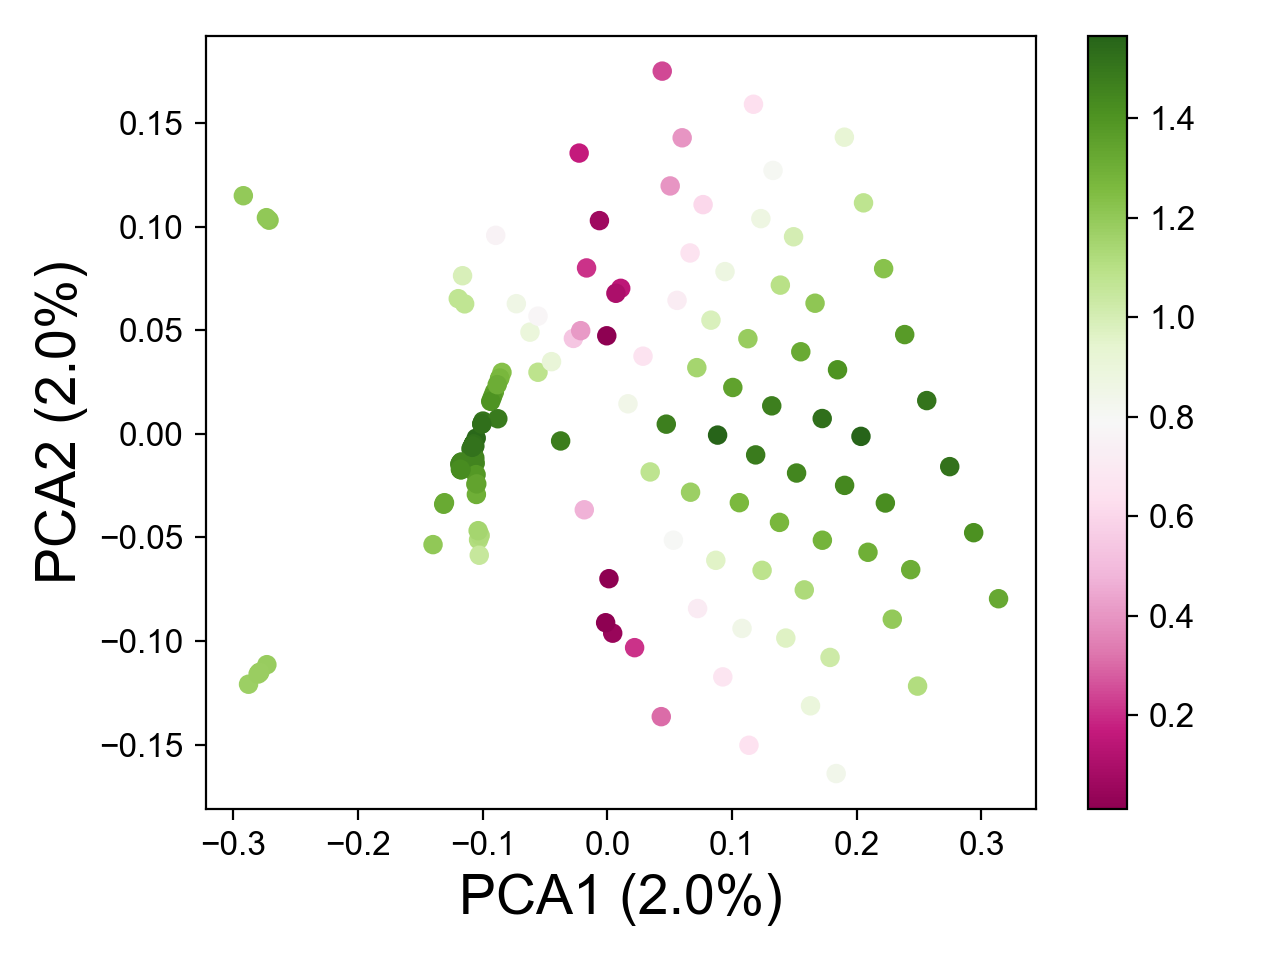

In [679]:
sc = plt.scatter(pca_df[0], pca_df[1], c=pca_df["cosin_angle"], cmap="PiYG")
plt.colorbar(sc)

plt.xlabel(f"PCA1 ({exp_var[0]*100:.1f}%)", fontsize=20)
plt.ylabel(f"PCA2 ({exp_var[0]*100:.1f}%)", fontsize=20)
plt.tight_layout()
plt.savefig("DCM_pca.pdf", bbox_inches="tight")
# k.plot_pca(standard["rmses"], title=f"Kernel ()", name=f"kernel_{k.uuid}.png")

In [665]:
k.X[0]

array([1.74999927, 1.74999951, 1.09240528, 1.09241769, 2.93534602,
       2.33254581, 2.33262234, 2.32326166, 2.32333588, 1.8119391 ])

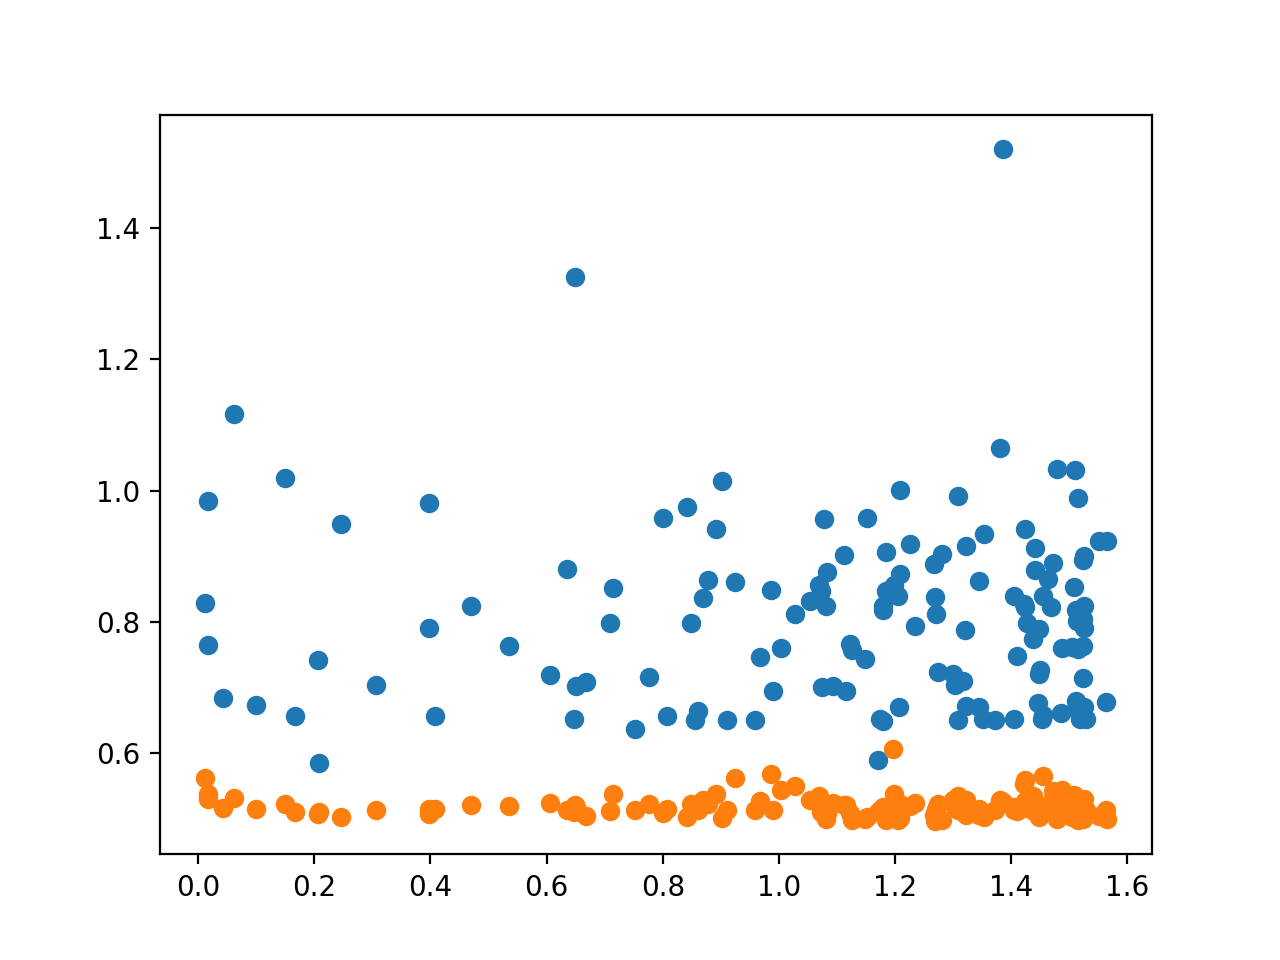

In [64]:
plt.scatter(pca_df["cosin_angle"], standard["rmses"])
plt.scatter(pca_df["cosin_angle"], test["rmse"])

In [18]:
test = csv_dict["opt_d293c229-019a-402e-85bd-6566dbff6abd_8.0"]
test

Unnamed: 0      rmse                                                pkl  \
0             0  0.500372  pkls/d293c229-019a-402e-85bd-6566dbff6abd/gaus...   
1             1  0.498389  pkls/d293c229-019a-402e-85bd-6566dbff6abd/gaus...   
2             2  0.517821  pkls/d293c229-019a-402e-85bd-6566dbff6abd/gaus...   
3             3  0.534528  pkls/d293c229-019a-402e-85bd-6566dbff6abd/gaus...   
4             4  0.504122  pkls/d293c229-019a-402e-85bd-6566dbff6abd/test...   
..          ...       ...                                                ...   
135         135  0.513679  pkls/d293c229-019a-402e-85bd-6566dbff6abd/gaus...   
136         136  0.549683  pkls/d293c229-019a-402e-85bd-6566dbff6abd/gaus...   
137         137  0.605758  pkls/d293c229-019a-402e-85bd-6566dbff6abd/gaus...   
138         138  0.517782  pkls/d293c229-019a-402e-85bd-6566dbff6abd/test...   
139         139  0.513667  pkls/d293c229-019a-402e-85bd-6566dbff6abd/test...   

     class  alpha                                  uuid   l2  type  
0     test    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0  scan  
1     test    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0  scan  
2    train    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0  scan  
3     test    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0  scan  
4     test    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0   nms  
..     ...    ...                                   ...  ...   ...  
135   test    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0  scan  
136   test    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0  scan  
137   test    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0  scan  
138   test    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0   nms  
139   test    0.0  d293c229-019a-402e-85bd-6566dbff6abd  8.0   nms  

[140 rows x 8 columns]

(array([37., 53., 28., 11.,  4.,  3.,  3.,  0.,  0.,  1.]),
 array([0.49694344, 0.50782486, 0.51870627, 0.52958769, 0.5404691 ,
        0.55135052, 0.56223194, 0.57311335, 0.58399477, 0.59487618,
        0.6057576 ]),
 <BarContainer object of 10 artists>)

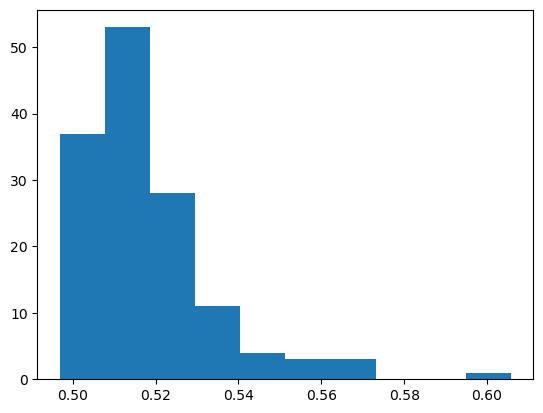

In [17]:
plt.hist(test["rmse"])

In [542]:
RMSELABEL = 'RMSE [(kcal/mol)/$e$]'

In [617]:
def plot_change2(test, opt, standard, pca_df, title=""):
    """
    """
    pca_df["cosin_angle"] = np.arctan2(abs(pca_df[0]), abs(pca_df[1]))

    delta_rmse = test["rmse"] - standard["rmses"]

    _ = test[["rmse", "class", "pkl"]]
    _["when"] = "k-MDCM"
    _["ca"] = pca_df["cosin_angle"]
    _["drmse"] = abs(delta_rmse)
    _

    b = standard[["rmses"]]
    b["rmse"] = standard["rmses"]
    b["class"] = _["class"]
    b["pkl"] = _["pkl"]
    b["when"] = "MDCM"
    b["ca"] = pca_df["cosin_angle"]
    b["drmse"] = abs(delta_rmse)

    c = opt[["rmse"]]
    c["class"] = _["class"]
    c["pkl"] = _["pkl"]
    c["when"] = "Opt."
    c["ca"] = pca_df["cosin_angle"]
    c["drmse"] = abs(delta_rmse)   
    
    comb = _.append(b, ignore_index="true")
    comb = comb.append(c, ignore_index="true")
    comb = comb[comb["class"] == "test"]

    _ = (ggplot(comb, aes('when', 'rmse'))
     + geom_violin(comb, style='full') # changed
     + geom_line(aes(group='pkl', color='ca', alpha="drmse"))         # new
     + theme_minimal()
    + ggtitle(title)
     + scale_alpha(range=(0.0,0.5), name="$\Delta$RMSE", show_legend=False)
     + scale_color_cmap("PiYG", name="$cos^{-1}(\mathbf{PCA})$")
      + theme(figure_size=(4, 4))
     + labs(y=RMSELABEL,
           x = "Optimization Process")
    + aes(ymin=0, ymax=1.5)
    ) 
    return _

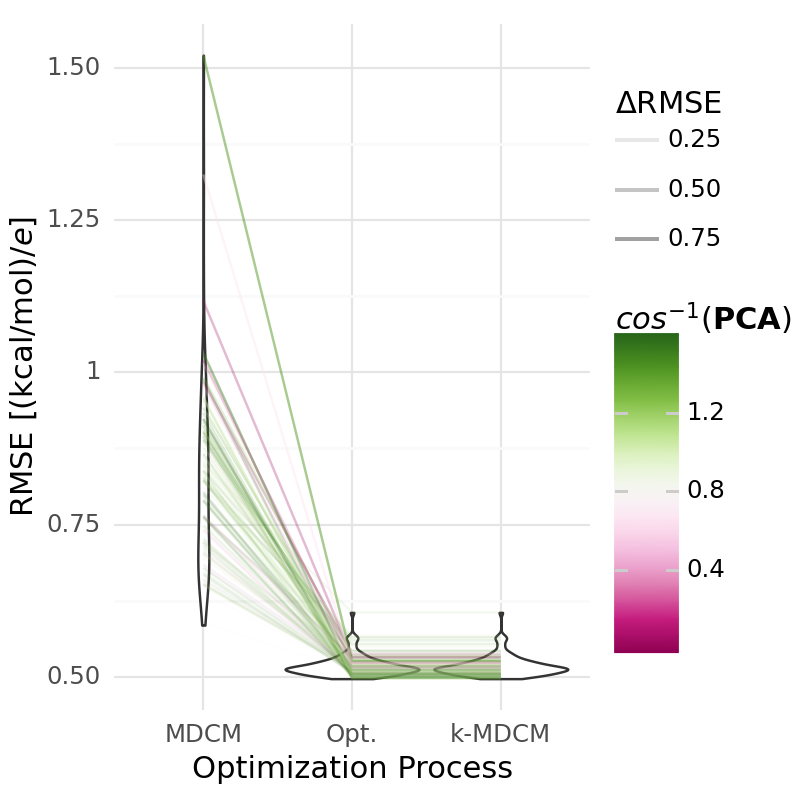

<Figure Size: (400 x 400)>

In [544]:
plot_change2(test, test, standard, pca_df, title="")

In [428]:
# def plot_change(test, standard, pca_df, title=""):
#     """
#     """
#     pca_df["cosin_angle"] = np.arctan2(abs(pca_df[0]), abs(pca_df[1]))

#     delta_rmse = test["rmse"] - standard["rmses"]

#     _ = test[["rmse", "class", "pkl"]]
#     _["when"] = "B"
#     _["ca"] = pca_df["cosin_angle"]
#     _["drmse"] = abs(delta_rmse)
#     _

#     b = standard[["rmses"]]
#     b["rmse"] = standard["rmses"]
#     b["class"] = _["class"]
#     b["pkl"] = _["pkl"]
#     b["when"] = "A"
#     b["ca"] = pca_df["cosin_angle"]
#     b["drmse"] = abs(delta_rmse)
#     b

#     comb = _.append(b, ignore_index="true")
#     comb = comb[comb["class"] == "test"]

#     _ = (ggplot(comb, aes('when', 'rmse'))
#      + geom_violin(comb, style='left-right') # changed
#      + geom_line(aes(group='pkl', color='ca', alpha="drmse"))         # new
#      + theme_minimal()
#     + ggtitle(title)
#      + scale_alpha(range=(0.0,0.9), name="$\Delta$RMSE", show_legend=False)
#      + scale_color_cmap("plasma", name="$cos(\\theta)$")
#       + theme(figure_size=(4, 4))
#      + labs(y='RMSE [(kcal/mol)/$e$]',
#            x = "Optimization Process")
#     + aes(ymin=0, ymax=1.5)
#     ) 
#     return _

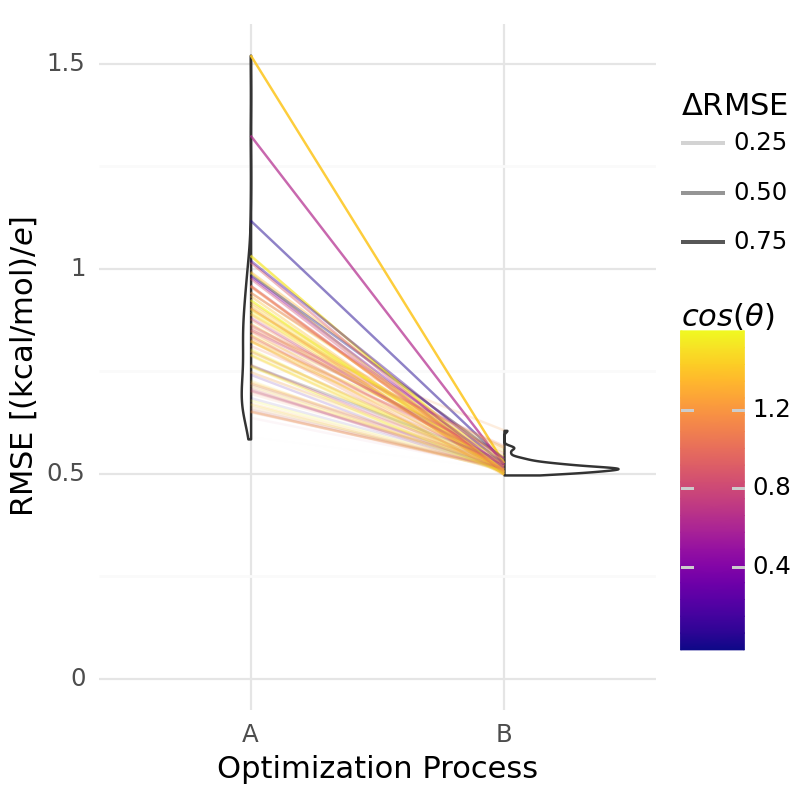

<Figure Size: (400 x 400)>

In [400]:
plot_change(test, standard, pca_df)

In [455]:
l2s = []
alphas = []
keys = []
rmses = []
evaluated = []


for k,v in csv_dict.items():
    if k != "standard_":
        evaluated.append(k.split("_")[0])
        l2s.append(v["l2"].mean())
        alphas.append(round(v["alpha"].mean(), 1))
        rmses.append(v["rmse"].median())
        keys.append(k)
        
ds = pd.DataFrame({"key": keys, 
                             "l2": l2s, 
                             "alpha": alphas, 
                             "rmse": rmses,
                             "class": evaluated})

# ds.groupby(["l2", "alpha"]).mean()
ds["_"] = ds["key"].apply(lambda x: x.split("_")[1])


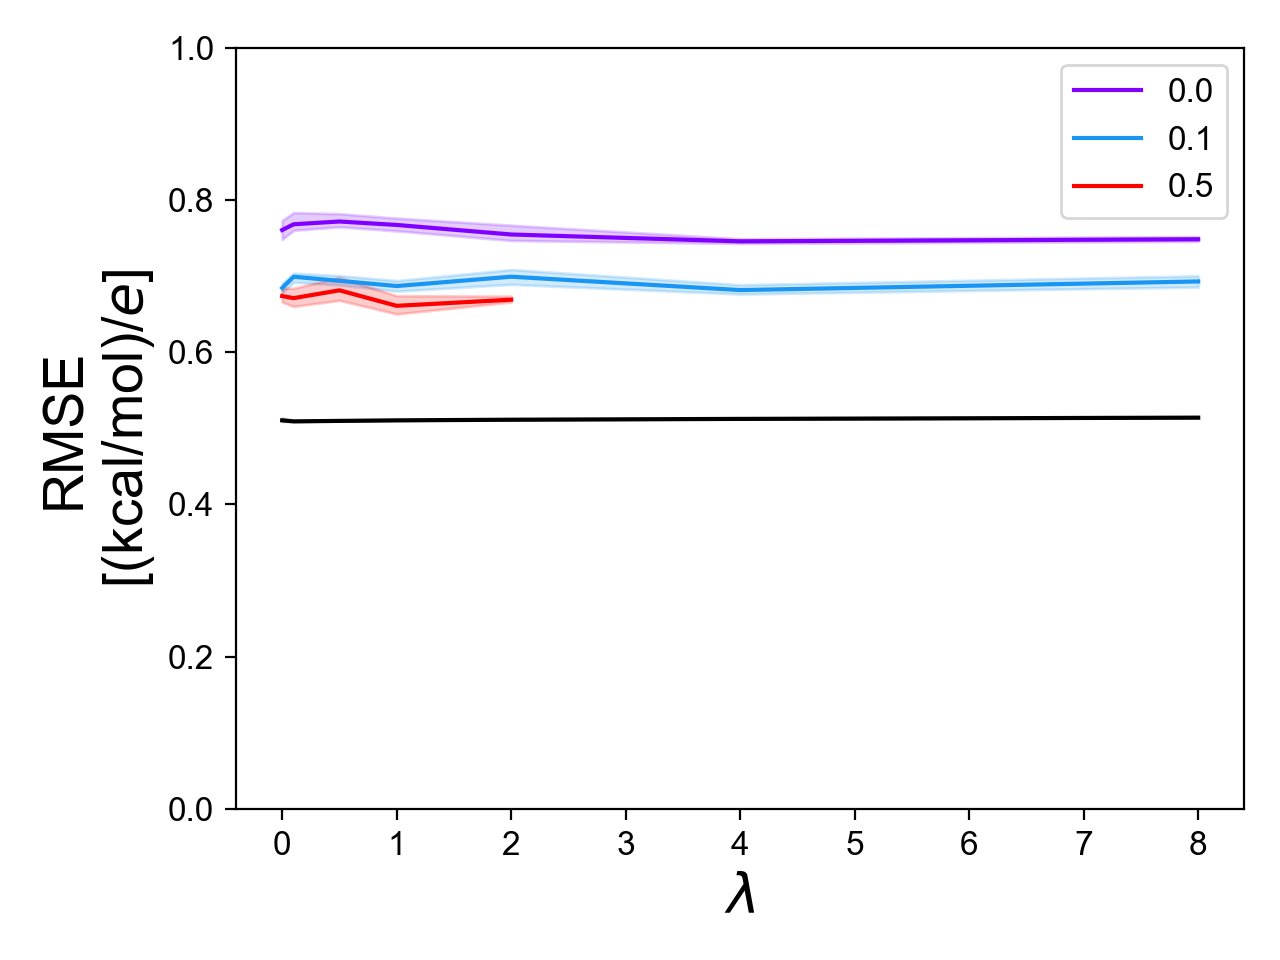

In [456]:
ax = sns.lineplot(data=ds[ds["class"] == "kernel"], 
                  x="l2", y="rmse", 
             hue="alpha", palette="rainbow", markers=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


ax = sns.lineplot(data=ds[ds["class"] == "opt"], 
                  x="l2", y="rmse", c="k",
             markers=True)

plt.xlabel("$\lambda$", fontsize=20)
plt.ylabel("RMSE\n[(kcal/mol)/$e$]", fontsize=20)
plt.ylim(0,1)
plt.tight_layout()

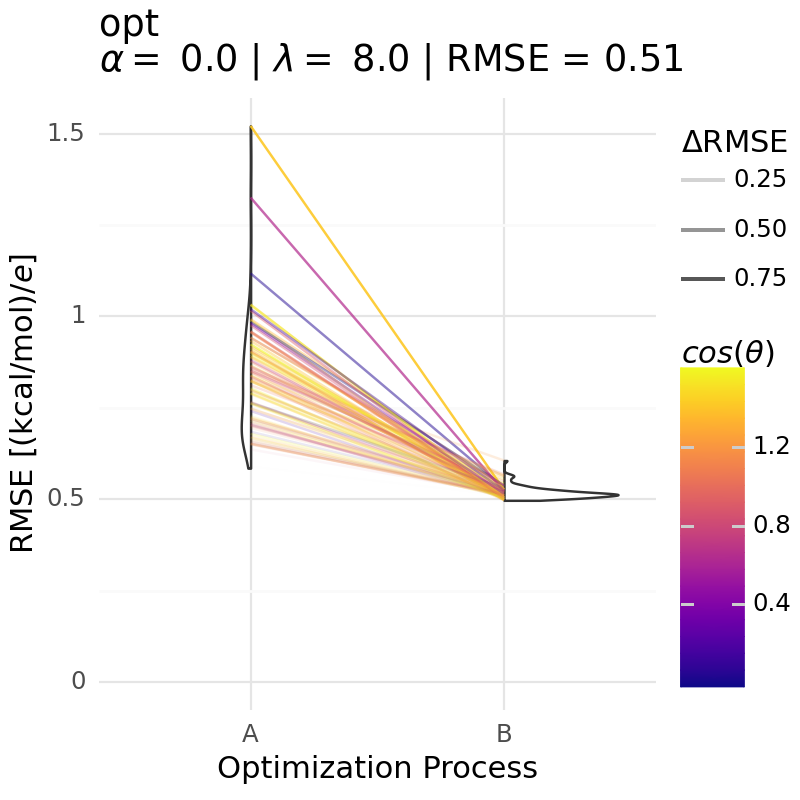

<Figure Size: (400 x 400)>

In [457]:
import warnings
warnings.filterwarnings("ignore")
i = 0
k = keys[i].split("_")[0]
plot_change(csv_dict[keys[i]], 
            standard, 
            pca_df, 
            title=f"{k}\n$\\alpha = $ {alphas[i]} | $\lambda = $ {l2s[i]} | RMSE = {rmses[i]:.2f}")

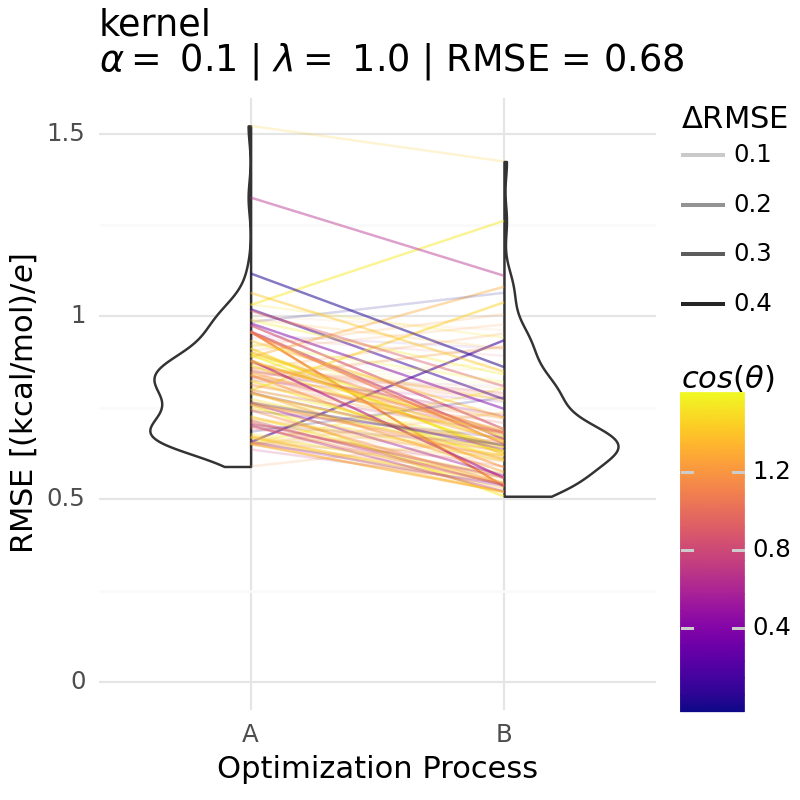

<Figure Size: (400 x 400)>

In [402]:
i = 10
k = keys[i].split("_")[0]
plot_change(csv_dict[keys[i]], 
            standard, 
            pca_df, 
            title=f"{k}\n$\\alpha = $ {alphas[i]} | $\lambda = $ {l2s[i]:.1f} | RMSE = {rmses[i]:.2f}")

<Figure size 100x100 with 0 Axes>

In [671]:
key1s = []
key2s = []
alphas = []
lambdas = []
split = []
rmse1 = []
rmse2 = []

for _ in list(set(ds["_"])):
    row = ds[ds["_"] == _]
    alphas.append(row["alpha"].mean())
    lambdas.append(row["l2"].mean())
    l = list(row["key"])

    if l[0].startswith("kernel_"):
        key1s.append(l[0])
        key2s.append(l[1])
        TEST1 = csv_dict[l[0]][csv_dict[l[0]]["class"] == "test" ]
        TEST2 = csv_dict[l[1]][csv_dict[l[1]]["class"] == "test" ]
        rmse1.append(TEST1["rmse"].median())
        rmse2.append(TEST2["rmse"].median())
        assert len(TEST1) == len(TEST2)
        split.append(len(TEST1))
    else:
        key1s.append(l[1])
        key2s.append(l[0])
        TEST1 = csv_dict[l[1]][csv_dict[l[1]]["class"] == "test" ]
        TEST2 = csv_dict[l[0]][csv_dict[l[0]]["class"] == "test" ]
        rmse1.append(TEST1["rmse"].median())
        rmse2.append(TEST2["rmse"].median())
        assert len(TEST1) == len(TEST2)
        split.append(len(TEST1))
        


In [672]:
ALPHA = "$\\alpha$"
LAMBDA = "$\lambda$"
ds_paired = pd.DataFrame({"key1": key1s, 
              "key2": key2s, 
              "split": split,
            "rmse1": rmse1,
            "rmse2":rmse2,
              ALPHA: alphas,
             LAMBDA: lambdas})

ds_paired["split"].unique()

array([105, 117, 129, 130,  70,  71, 123, 126, 118, 106, 127])

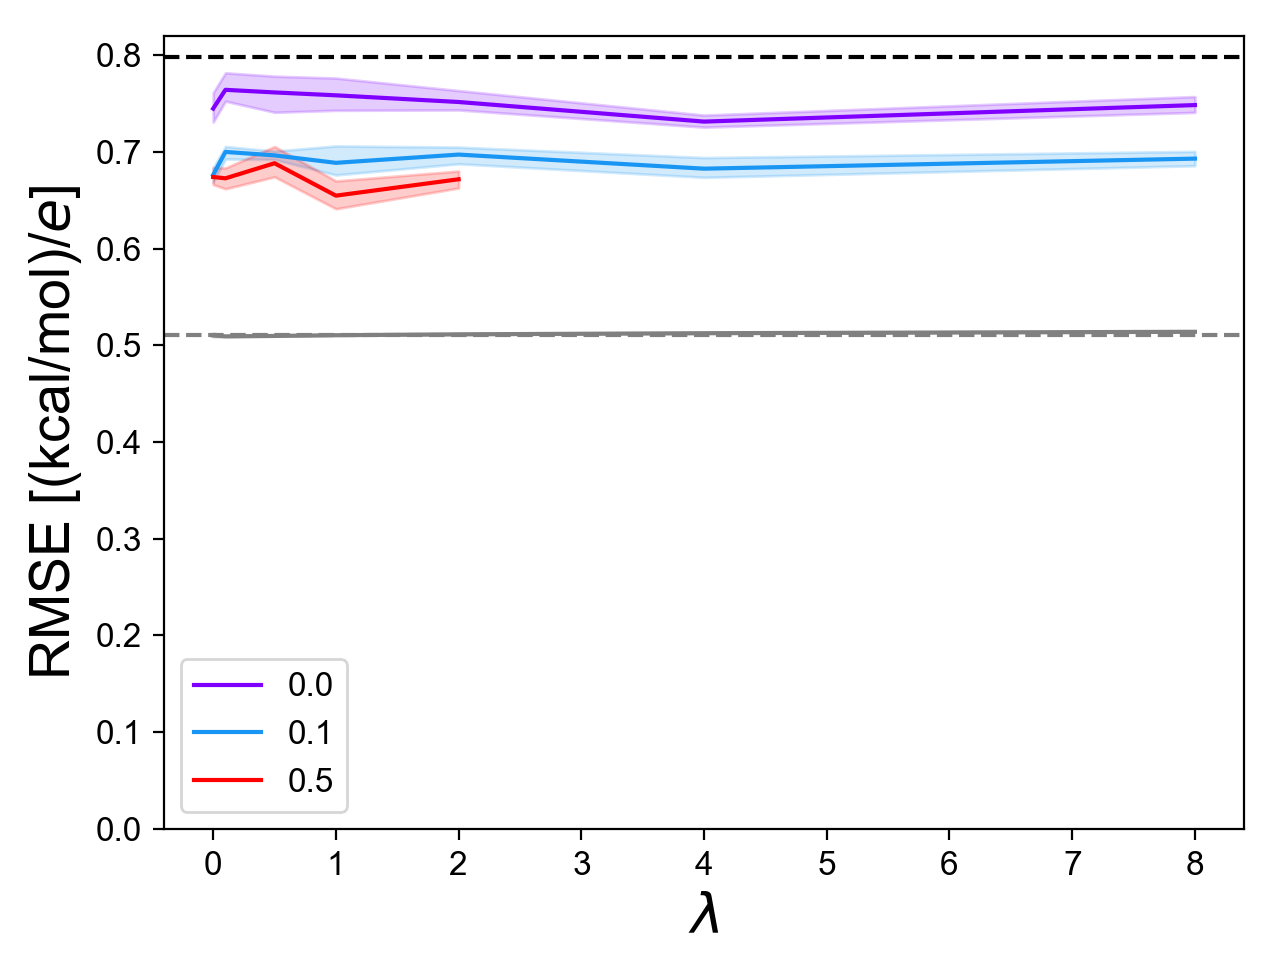

In [678]:
ax = sns.lineplot(data=ds_paired, 
                  x=LAMBDA, y="rmse1", 
             hue=ALPHA, palette="rainbow", markers=True)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax = sns.lineplot(data=ds_paired, 
                  x=LAMBDA, y="rmse2", markers=True,c="gray")
plt.tight_layout()
plt.axhline(standard.rmses.median(), c="k", linestyle="--")
plt.axhline(ds_paired.rmse2.median(), c="gray", linestyle="--")
plt.ylim(0, 0.82)
plt.xlabel(LAMBDA, fontsize=20)
plt.ylabel(RMSELABEL, fontsize=20)
plt.savefig("median_RMSE_summary.pdf", bbox_inches = "tight")

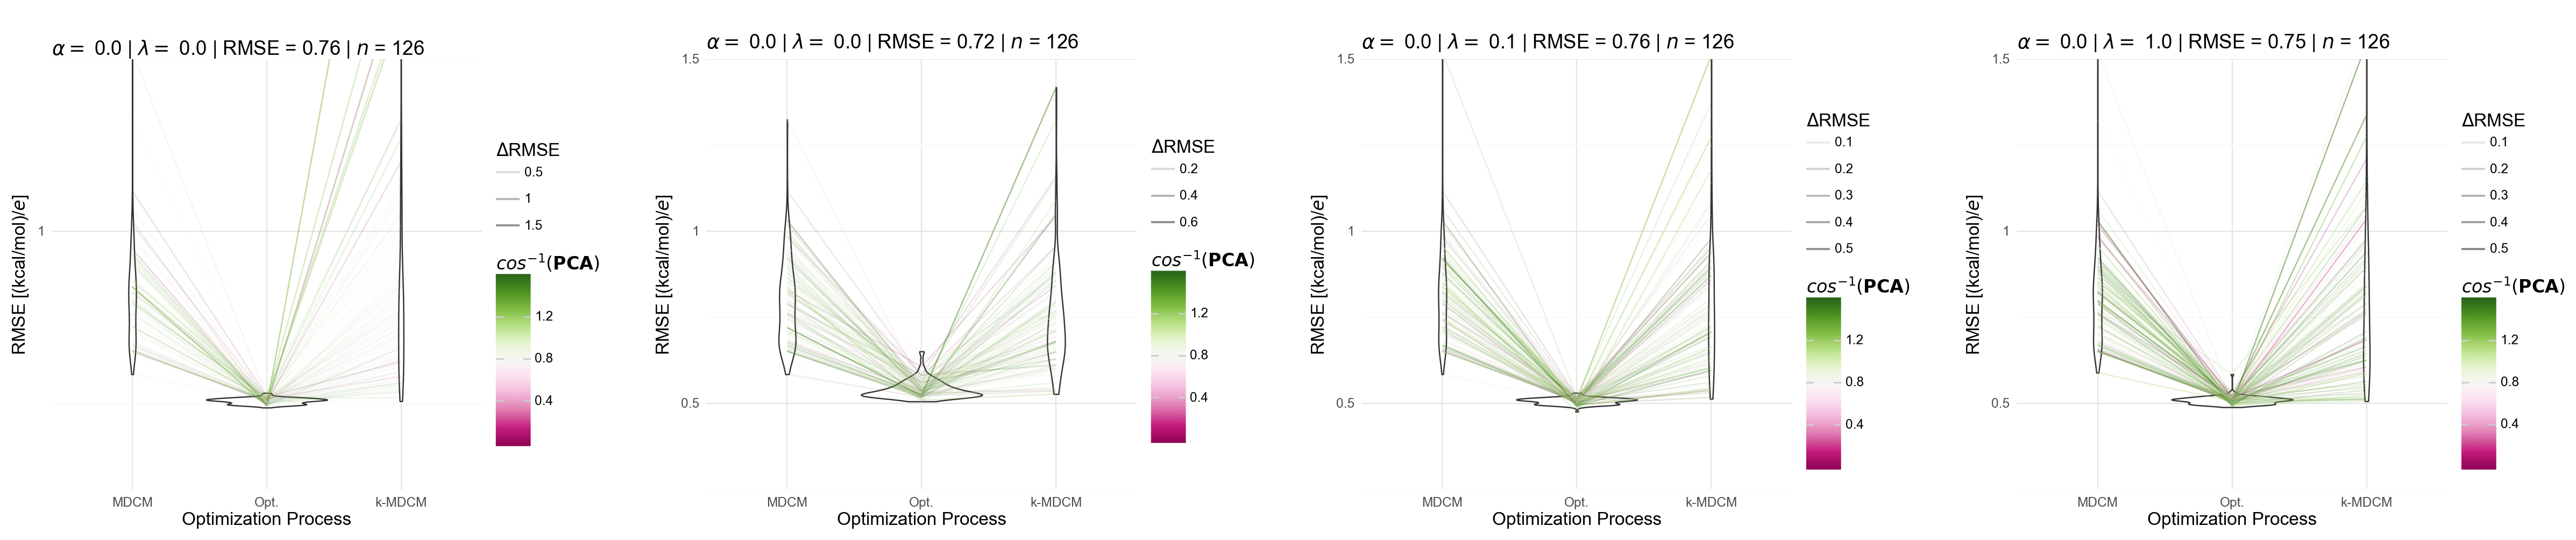

In [645]:
ds_paired1 = ds_paired.sort_values([ALPHA, LAMBDA, "split"]).copy()
ds_paired1 = ds_paired1[ds_paired1["split"] == 126]
ds_paired1 = ds_paired1[ds_paired1[ALPHA] == 0.]
ds_paired1 = ds_paired1[ds_paired1[LAMBDA] < 1.1]
bricks1 = [get_brick(row) for row in ds_paired1.iterrows()]
for _ in bricks1:
    _.set_ylim(0.25,1.5)
combined1 = bricks1[0] | bricks1[1] | bricks1[2] | bricks1[3]
combined1

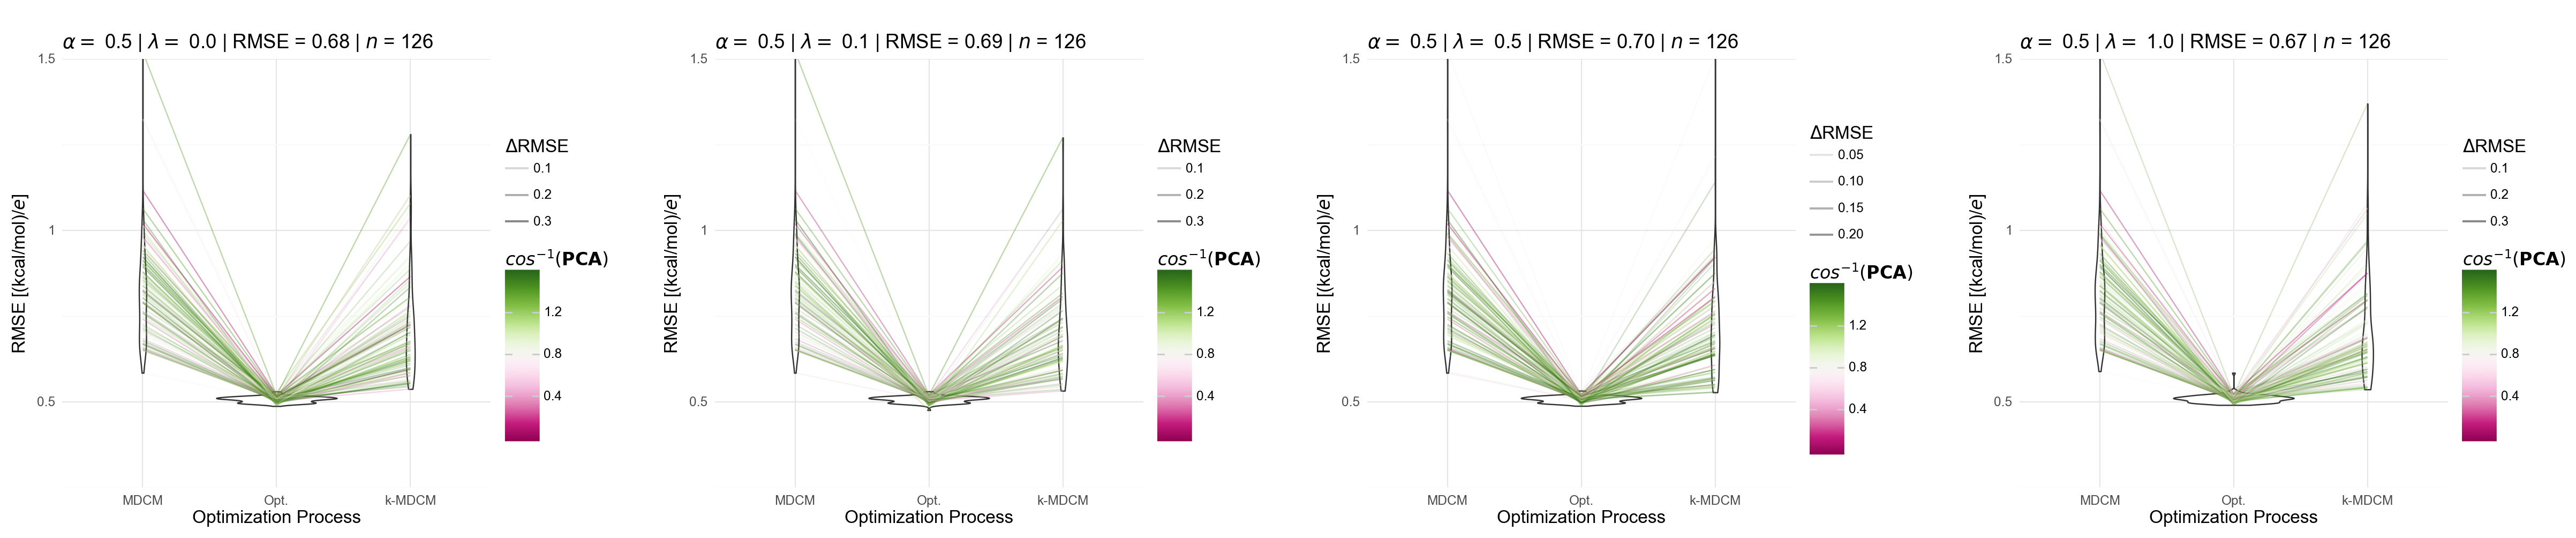

In [646]:
ds_paired2 = ds_paired.sort_values([ALPHA, LAMBDA, "split"]).copy()
ds_paired2 = ds_paired2[ds_paired2["split"] == 126]
ds_paired2 = ds_paired2[ds_paired2[ALPHA] == 0.5]
ds_paired2 = ds_paired2[ds_paired2[LAMBDA] < 1.1]
bricks2 = [get_brick(row) for row in ds_paired2.iterrows()]
for _ in bricks2:
    _.set_ylim(0.25,1.5)
combined2 = bricks2[0] | bricks2[1] | bricks2[2] | bricks2[3]
combined2

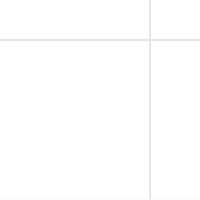

In [668]:
group = (combined1 / combined2)
group.savefig("combined_fig_126.pdf")